# Исследование объявлений о продаже квартир

В распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 

Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

___
# Research of ads for the sale of apartments

At the disposal of the Yandex service data.Real estate — archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. You need to learn how to determine the market value of real estate. 

The task is to set the parameters. This will allow you to build an automated system: it will track anomalies and fraudulent activity. 

There are two types of data available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically based on cartographic data. For example, the distance to the center, airport, nearest park and reservoir.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #функция, чтобы не вылетали ошибки (для эстетики), на которые можно не реагировать

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(df.head(15))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


* Имеются пропущенные значения в 14 колонках:

`ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition`

* формат даты-времени в столбце `first_day_exposition` необходимо причести в "читаемый" вид

* обнаруженные NaN необходимо будет заполнить значениями (средними или медианными), а также проверить данные на "аномальность" с последующим их удалением если такие возникнут.



* There are missing values in 14 columns:
`ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition`
* the date-time format in the `first_day_exposition` column must be converted to a "readable" form
* the detected NaN will need to be filled in with values (average or median), as well as check the data for "anomaly" and then delete them if such occur.

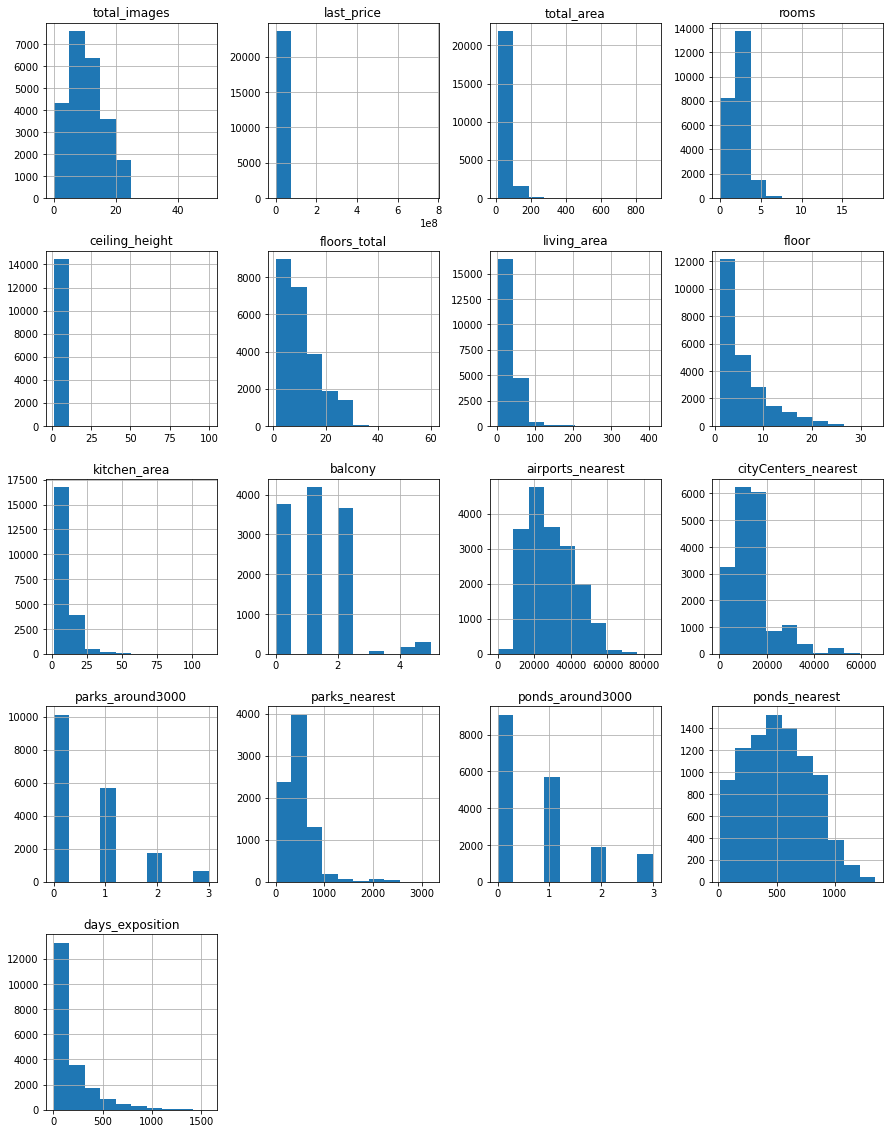

In [2]:
df.hist(figsize=(15, 20))
plt.show()

In [3]:
#проверяем корректность обозначений столбцов
#checking the corbrectness of the column designations
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

В столбцах `cityCenters_nearest`, `parks_around3000` и `ponds_around3000` указано неправильное написание. Нужно придать им надлежащий вид


`cityCenters_nearest`, `parks_around3000` and `ponds_around3000` columns have incorrect spelling. Need to give them the proper look

In [4]:
#отображаем общую информацию датасета, смотрим типы и заполненность колонок
#we display the general information of the dataset, look at the types and fullness of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Вероятно, колонка `is_apartment` должна иметь булевый тип.

Probably, the `is_apartment` column should have a Boolean type.

In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


## Вывод

Датафрейм состоит из 23699 строк и 22 столбцов. Имеются пропущенные значения NaN, которые необходимо обработать. Например, какие-то пропущенные значение заменим сразу, какие-то оставим впоть перед построением графиков.

Также необходимо выяснить, каким образом заполнить пропущенные значения (средней или медианой), а также определить выбросы, например, интересны максимальные и минимальные значения по столбцу total_area, необходимо посмотреть, что это за объекты. 

Столбцы `cityCenters_nearest`, `parks_around3000` и `ponds_around3000` - нужно будет переименовать в корректный вид, иначе сложно будет произвести расчеты по ним. Значения по столбцу `last_price` - нужно привести в "читабельный" вид.

Важно отметить, что пропуски и аномальные данные очень сильно влияют на стандартное отклониение, например 0 и 19 комнат в столбце `rooms`, а также высота потолков в столбце `ceiling_height`, что составила 1,26 в std, да площадь помещения...

Заодно будет лучшим решением указать более наглядный формат даты в столбце `first_day_exposition`.

Однозначно необходима предобработка данных, так как наблюдаются нетипичные данные с подозрительно низкими и высокими показателями, что не позволят ответить на главные вопросы исследования и сформировать корректные выводы.
___
The dataframe consists of 23699 rows and 22 columns. There are missing NaN values that need to be processed. For example, some missing values will be replaced immediately, some will be left in place before plotting.

You also need to figure out how to fill in the missing values (average or median), as well as determine outliers, for example, the maximum and minimum values for the total_area column are interesting, you need to see what kind of objects they are. 

The columns `cityCenters_nearest`, `parks_around3000` and `ponds_around3000` will need to be renamed to the correct form, otherwise it will be difficult to make calculations on them. The values for the `last_price` column should be brought into a "readable" form.

It is important to note that omissions and anomalous data greatly affect the standard deviation, for example 0 and 19 rooms in the `rooms` column, as well as the ceiling height in the `ceiling_height` column, which was 1.26 in std, and the room area...

At the same time, it would be a better solution to specify a more visual date format in the `first_day_exposition` column.

Data preprocessing is definitely necessary, since atypical data with suspiciously low and high indicators are observed, which will not allow answering the main questions of the study and forming correct conclusions.

### Предобработка данных

In [6]:
def Find_nans(df):
    for col in df.columns:
        print("{0}, num. NA's: {1}".format(col, pd.isnull(df[col])))

In [7]:
#переименовываем столбцы
#renaming columns

df.rename(columns={
    'cityCenters_nearest': 'city_centers_nearest', 
    'parks_around3000': 'parks_around_3000', 
    'ponds_around3000': 'ponds_around_3000'}, inplace=True) 
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [8]:
#определяем долю пропусков по тем столбцам, где они имеются
#we determine the proportion of omissions by those columns where they are available

#(df.loc[:, df.columns[df.isna().any()]].isna().mean()*100)
df.isna().mean()*100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
city_centers_nearest    23.287902
parks_around_3000       23.283683
parks_nearest           65.909954
ponds_around_3000       23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

Пропущенные значения в колонках: `ceiling_height`, `living_area`, `kitchen_area` - крайне необходимы для последующих расчетов и анализа. Их мы будем заменять средними значениями в зависимости от общей площади.

Пропуски в  столбцах `floors_total`, `locality_name` составляют менее 1 процента, пожалуй мы их не будем трогать.

Важно отметить, что на цену влияет тот факт, аппартаменты это или же жилая площадь. Как раз-таки максимальное количество пропусков (88.29%) присутствует в столбце `is_apartment`. Как правило, доля таких квартир минимальная, поэтому заменим на False.

Пропуски имеются в 20924 строках. Учитывая, что всего 23699 строк, то видимо наибольшая часть пропущенных значений говорит о том, что каких-либо значений нет, например, балкона. Вероятно по этому этот столбец имеет наибольшее количество пропусков. В этом еще нужно будет удостоверится.
___
The missing values in the columns: `ceiling_height`, `living_area`, `kitchen_area` - are extremely necessary for subsequent calculations and analysis. We will replace them with average values depending on the total area.

The gaps in the columns `floors_total`, `locality_name` are less than 1 percent, perhaps we will not touch them.

It is important to note that the price is influenced by the fact whether it is an apartment or a living area. Just the same, the maximum number of omissions (88.29%) is present in the `is_apartment` column. As a rule, the share of such apartments is minimal, so we will replace it with False.

There are omissions in 20924 lines. Considering that there are only 23699 rows, then apparently the largest part of the missing values indicates that there are no values, for example, a balcony. This is probably why this column has the largest number of omissions. This will still need to be verified.

In [9]:
print(df['last_price'].unique())

[13000000.  3350000.  5196000. ...  6151120. 21400000. 11475000.]


In [10]:
#Приводим в целочисленный тип стоимость квартиры
#Convert the cost of the apartment to an integer type

df['last_price'] = df['last_price'].astype(int)
print(df['last_price'])

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int64


In [11]:
#смотрим характеристики, дающие представление о выборке
#looking at the characteristics that give an idea of the sample
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

(-50.0, 110000000.0)

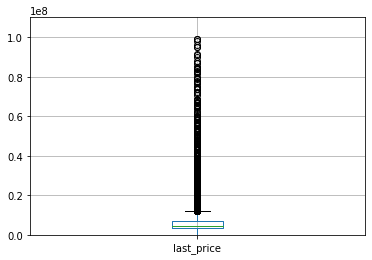

In [12]:
df.boxplot('last_price')
plt.ylim(-50, 110000000)

(0.0, 13000000.0)

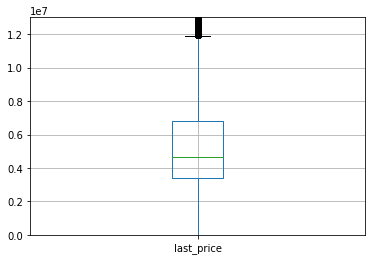

In [13]:
df.boxplot('last_price')
plt.ylim(0, 13000000)

Сортировка по максимальной цене: 12971    763000000
19540    420000000
14706    401300000
1436     330000000
15651    300000000
22831    289238400
16461    245000000
13749    240000000
5893     230000000
8900     190870000
Name: last_price, dtype: int64


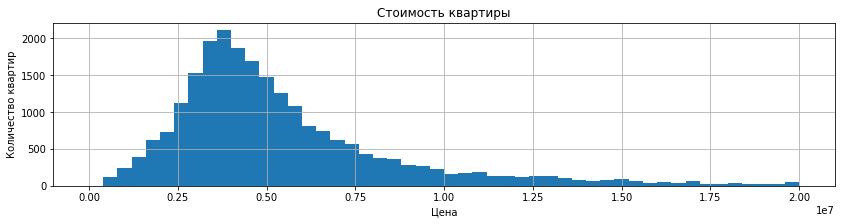

In [14]:
pd.Series(df['last_price']).hist(bins=50, figsize=(14,3), range=(0,20000000))
plt.title('Стоимость квартиры')
plt.xlabel('Цена')
plt.ylabel('Количество квартир');
print('Сортировка по максимальной цене:', df['last_price'].sort_values(ascending=False).head(10))

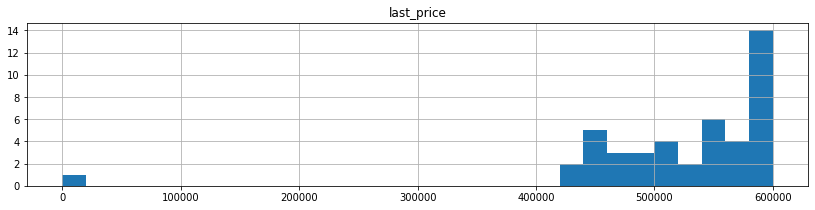

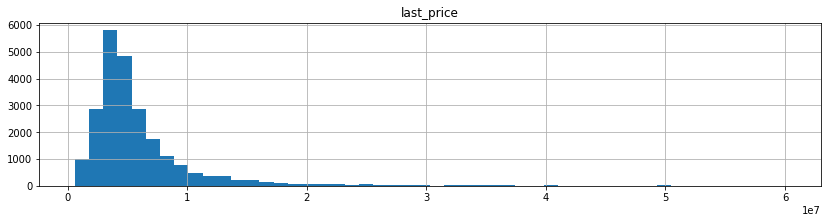

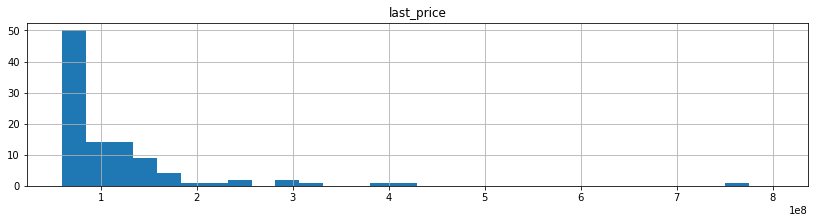

In [15]:
#посмотрим на график более детально, разбив его на 3 части
#let's look at the graph in more detail, breaking it into 3 parts
df.hist('last_price', bins=30, figsize=(14,3), range=(0, 600000));
df.hist('last_price', bins=50, figsize=(14,3), range=(600001, 60000000));
df.hist('last_price', bins=30, figsize=(14,3), range=(60000001, 800000000));

Есть "Выбросы" - редкие и выбивающиеся значения. Избавимся от них, чтобы данные были более равномерные.

Оставим все что >400тыс.руб и <100млн.р., остальное удалим.
___
There are "Outliers" - rare and outlier values. Let's get rid of them so that the data is more uniform.

We will leave everything that is >400 thousand rubles and <100 million rubles, we will delete the rest.

In [16]:
df = df.loc[(df['last_price']>400000) & (df['last_price']<100000000)]
df.reset_index(inplace=True, drop=True)

Сортировка по максимальной цене: 5621     99000000
6610     99000000
16564    98000000
155      96000000
11313    95000000
492      95000000
12385    91500000
22457    91075000
509      90000000
15128    88000000
Name: last_price, dtype: int64


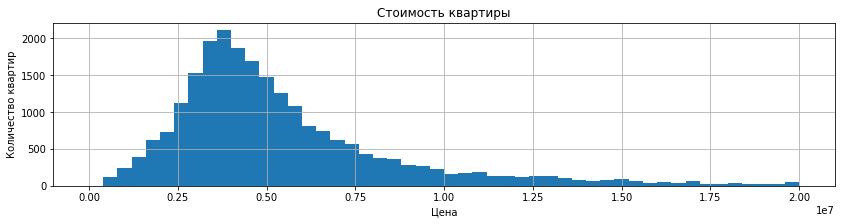

In [17]:
#строим гигстограмму
df['last_price'].hist(bins=50, figsize=(14,3), range=(0,20000000))
plt.title('Стоимость квартиры')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
print('Сортировка по максимальной цене:', df['last_price'].sort_values(ascending=False).head(10))

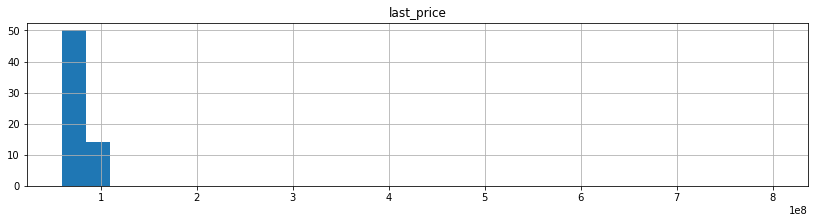

In [18]:
df.hist('last_price', bins=30, figsize=(14,3), range=(60000001, 800000000));

Удалены выдающиеся значения (менее 400тыс.руб. и более 100млн. руб.), чтобы данные были более равномерные.
___
The outstanding values (less than 400 thousand rubles and more than 100 million rubles) have been removed so that the data is more uniform.

In [19]:
print(df['first_day_exposition'].head())
print(df['first_day_exposition'].unique())

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object
['2019-03-07T00:00:00' '2018-12-04T00:00:00' '2015-08-20T00:00:00' ...
 '2014-12-29T00:00:00' '2016-09-12T00:00:00' '2015-07-19T00:00:00']


In [20]:
#приводим к "временному" формату
#bring it to the "temporary" format
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y%m%dT%H:%M:%S')

#проверяем
#checking
print(df['first_day_exposition'].head())
print(df['first_day_exposition'].unique())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]
['2019-03-07T00:00:00.000000000' '2018-12-04T00:00:00.000000000'
 '2015-08-20T00:00:00.000000000' ... '2014-12-29T00:00:00.000000000'
 '2016-09-12T00:00:00.000000000' '2015-07-19T00:00:00.000000000']


In [21]:
print(df['rooms'].unique())

[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16]


Пропусков по столбцу `rooms` изначально не было, однако мы видим "нулевые" квартиры. Это либо студии, либо опен-план.
___
Initially there were no gaps in the `rooms` column, but we see "zero" apartments. It's either studios or an open plan.

In [22]:
#находим строки, в которых количество комнат = 0
#find the lines in which the number of rooms = 0

df_rooms = df[df['rooms'] == 0]
df_rooms

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,2450000,27.00,2017-03-30,0,NaN,24.0,15.50,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000,25.00,2017-09-27,0,NaN,14.0,17.00,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000,27.11,2018-03-12,0,NaN,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000,34.40,2017-03-28,0,NaN,26.0,24.30,19,NaN,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000,25.00,2019-02-20,0,NaN,10.0,NaN,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23172,7,3200000,26.00,2017-09-01,0,NaN,25.0,18.00,16,NaN,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23404,0,2500000,27.70,2017-09-28,0,NaN,24.0,18.00,4,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23516,15,3350000,26.00,2018-09-07,0,NaN,19.0,NaN,8,NaN,...,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23554,10,1450000,29.00,2017-11-11,0,NaN,9.0,18.00,8,NaN,...,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


In [23]:
#находим долю комнат со значением 0 из общей доли датафрейма
#find the proportion of rooms with a value of 0 from the total proportion of the dataframe

print((len(df_rooms) / len(df)) * 100)

0.8325937196230083


Не более 1% из общей выборки. 

Предполагаю, что 0 - это 0 комнат , что характерно для планировок типа опен-план или студий.
Как правило, считают только жилые комнаты.

Учитывая это, квартиры типа опен-спейс или студии сами по-себе представляют одну большую комнату, то правильнее прировнять "нулевые" квартиры к квартирам с 1 комнатой. Тем более, площадь таких комнат не более 40 кв.м., что видно в столбце total_area.

Следую этой логике, принимаемм решение заменить 0 на 1.
___
No more than 1% of the total sample. 

I assume that 0 is 0 rooms, which is typical for open-plan layouts or studios.
As a rule, only living rooms are considered.

Considering this, open-space apartments or studios themselves represent one large room, then it is more correct to equate "zero" apartments to apartments with 1 room. Moreover, the area of such rooms is no more than 40 sq.m., as can be seen in the total_area column.

Following this logic, we decide to replace 0 with 1.

In [24]:
#заменяем уникальное значение "0" в колонке rooms на 1
#replace the unique value "0" in the rooms column with 1

df = df.replace({'rooms': {0:1}})
print(df['rooms'].unique())

[ 3  1  2  4  5  6  7 11  8 14 10 15  9 19 16]


In [25]:
#смотрим характеристики, дающие представление о выборке
#looking at the characteristics that give an idea of the sample
df['rooms'].describe()

count    23661.000000
mean         2.074046
std          1.057323
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

(-1.0, 20.0)

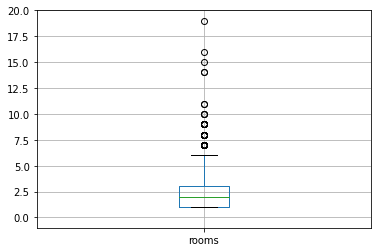

In [26]:
df.boxplot('rooms')
plt.ylim(-1, 20)

Квартиры, с количеством комнат больше 6 - уже являются выбросами.
Можно предположить, что если мы избавимся от них, то и картина предыдущих графиков по площади и стоимости - изменится.
___
Apartments with more than 6 rooms are already outliers.
It can be assumed that if we get rid of them, then the picture of the previous graphs in terms of area and cost will change.



In [27]:
#удаляем выбросы
#сначала столбец rooms переводим в формат int64
#first, we convert the rooms column to int64 format
df['rooms'] = pd.to_numeric(df['rooms']) 
#передаем в Dataframe отфильтрованные строки
#passing the filtered strings to the Dataframe
df = df[df['rooms'] < 6] 

(-1.0, 7.0)

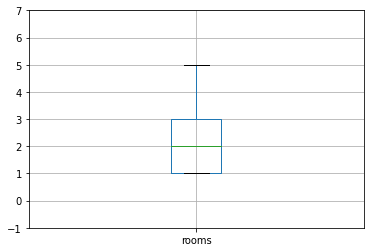

In [28]:
df.boxplot('rooms')
plt.ylim(-1, 7)

Text(0, 0.5, 'Количество квартир')

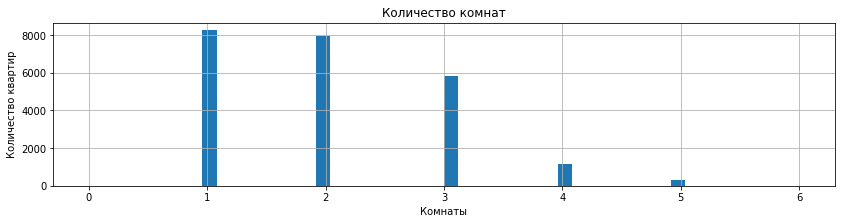

In [29]:
#строим гигстограмму
#building a gigstogram
pd.Series(df['rooms']).hist(bins=50, figsize=(14,3), range=(0,6))
plt.title('Количество комнат')
plt.xlabel('Комнаты')
plt.ylabel('Количество квартир')

In [30]:
print(df['ceiling_height'].unique())

[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   2.87   2.66   2.59   2.     2.45   3.6    2.92
   3.11   3.13   3.8    3.15   3.55   3.62   3.12   2.53   2.74   2.96
   2.46   5.     2.79   2.95   4.06   2.94   3.54   3.53   2.83   2.4
   3.38   3.01   5.6    3.65   3.18   3.35   2.3    3.57   2.48   2.62
   2.82   3.98   2.63   3.83   3.52   3.95   3.75   2.88   3.67   3.66
   4.19   3.24   4.8    4.5    4.2    3.36   3.86  32.     3.08   3.68
   3.07   3.37   3.09   8.     3.16   3.26   3.34   2.81   3.44   2.97
   4.37   2.68   3.9    3.27  27.     4.1    2.93   3.46  24.     3.47
   3.33   3.63   3.14   3.32  26.     1.2    8.3    2.98   2.86   3.17
   3.28   4.4    3.04   4.45   5.5    3.84   3.23   3.02   3.21   3.78
   4.3    

In [31]:
#СОРТИРОВКА
sort_ceiling = df[df['ceiling_height'] < 2.7]
sort_ceiling = df[df['ceiling_height'] > 5]
print(sort_ceiling)
print(sort_ceiling.sort_values(by='ceiling_height'))

       total_images  last_price  total_area first_day_exposition  rooms  \
355              17     3600000        55.2           2018-07-12      2   
1384             20    59800000       399.0           2015-01-21      5   
3139             14     2900000        75.0           2018-11-12      3   
3465              3     1400000        30.0           2018-03-16      1   
4634              0     4300000        45.0           2018-02-01      2   
4867              7     3000000        25.0           2017-09-27      1   
5066              0     3850000        30.5           2018-10-03      1   
5236              0     2500000        54.0           2017-10-13      2   
5659              4     4400000        50.0           2017-08-08      2   
5797             17     8150000        80.0           2019-01-09      2   
5853             20     5650000        45.0           2018-08-15      1   
6235              6     3300000        44.4           2019-03-25      2   
7566             17    38

<AxesSubplot:>

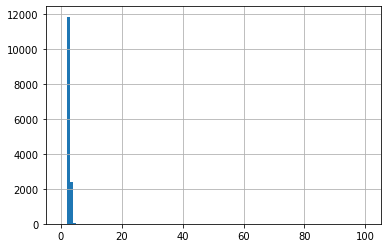

In [32]:
df['ceiling_height'].hist(bins=100,range=(0,100))

Среди редких значений указаны высота потолков 20, 22.6, 24, 25, 26, 27 м и 32 м. Логично предположить, что на самом деле это вещественные значения, например 2.4 м и 3.2 м. Обработаем аномалии в этом столбце.
Что касается таких выбивающихся значений как 100 м, 14 м, 10.3, то удалять их не нужно поскольку квартира не может быть без потолка - прираняем их к медианным значениям.
___
Among the rare values are the ceiling height 20, 22.6, 24, 25, 26, 27, 27.5 and 32 m. It is logical to assume that in fact these are real values, for example 2.4 m and 3.2 m. Let's process the anomalies in this column.
As for such knockout values as 100 m, 14 m, 10.3, it is not necessary to remove them because the apartment cannot be without a ceiling - we attach them to the median values.

#способ фильтрации что есть выбросы
    
#df.loc[df.ceiling_height>20, 'ceiling_height'] = df.loc[df.ceiling_height>20, 'ceiling_height'] / 10`
    
    
#Если будет миллион значений, то поможет только гистограмма.

In [33]:
#заменяем несколько редких значений на предполагаемые правдоподобные в которых вероятно опечатались
#we replace a few rare values with assumed plausible ones in which they were probably misspelled

df = df.replace({'ceiling_height':{20:2, 22.6:2.26, 24:2.4, 25:2.5, 26:2.6, 27:2.7, 27.5:2.75, 32:3.2}}) 
print(df['ceiling_height'].unique())

[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76   2.58
   3.7    2.52   2.87   2.66   2.59   2.     2.45   3.6    2.92   3.11
   3.13   3.8    3.15   3.55   3.62   3.12   2.53   2.74   2.96   2.46
   5.     2.79   2.95   4.06   2.94   3.54   3.53   2.83   2.4    3.38
   3.01   5.6    3.65   3.18   3.35   2.3    3.57   2.48   2.62   2.82
   3.98   2.63   3.83   3.52   3.95   3.75   2.88   3.67   3.66   4.19
   3.24   4.8    4.5    4.2    3.36   3.86   3.08   3.68   3.07   3.37
   3.09   8.     3.16   3.26   3.34   2.81   3.44   2.97   4.37   2.68
   3.9    3.27   4.1    2.93   3.46   3.47   3.33   3.63   3.14   3.32
   1.2    8.3    2.98   2.86   3.17   3.28   4.4    3.04   4.45   5.5
   3.84   3.23   3.02   3.21   3.78   4.3    3.39   2.69   3.22   3.31
   5.3  

In [34]:
#заменяем остальные выбивающиеся значения на стандартную высоту потолка, равную 2,7 м.
#we replace the remaining knockout values to a standard ceiling height of 2.7 m.

#создаю функцию для замены значения в столбце 'ceiling_height' стандартное значение
#creating a function to replace the value in the 'ceiling_height' column with the standard value

def func_hegiht(row):
    if row['ceiling_height'] > 5.00:
        return 2.70
    elif row['ceiling_height'] <= 2.00:
        return 2.70 
    #elif row['ceiling_height'].isna() == None:
        #return 2.70 
    return row['ceiling_height']
df['ceiling_height'] = df.apply(func_hegiht, axis=1)

print(df['ceiling_height'].unique())

[2.7   nan 3.03 2.5  2.67 2.56 3.05 2.75 2.6  2.9  2.8  2.55 3.   2.65
 3.2  2.61 3.25 3.45 2.77 2.85 2.64 2.57 4.15 3.5  3.3  2.71 4.   2.47
 2.73 2.84 3.1  2.34 3.4  3.06 2.72 2.54 2.51 2.78 2.76 2.58 3.7  2.52
 2.87 2.66 2.59 2.45 3.6  2.92 3.11 3.13 3.8  3.15 3.55 3.62 3.12 2.53
 2.74 2.96 2.46 5.   2.79 2.95 4.06 2.94 3.54 3.53 2.83 2.4  3.38 3.01
 3.65 3.18 3.35 2.3  3.57 2.48 2.62 2.82 3.98 2.63 3.83 3.52 3.95 3.75
 2.88 3.67 3.66 4.19 3.24 4.8  4.5  4.2  3.36 3.86 3.08 3.68 3.07 3.37
 3.09 3.16 3.26 3.34 2.81 3.44 2.97 4.37 2.68 3.9  3.27 4.1  2.93 3.46
 3.47 3.33 3.63 3.14 3.32 2.98 2.86 3.17 3.28 4.4  3.04 4.45 3.84 3.23
 3.02 3.21 3.78 4.3  3.39 2.69 3.22 3.31 3.56 2.2  3.85 3.51 3.93 3.42
 2.99 3.49 4.14 2.91 3.88 4.25 2.25 3.76 3.69 4.7  2.26 2.89 3.58 2.49
 3.48 3.59]


In [35]:
#заменяем nan в колонке ceiling_height на медианное значение
#replace nan in the ceiling_height column with the median value

df_ceiling_height_median = df['ceiling_height'].median()
print('median value =', df_ceiling_height_median)

df['ceiling_height'] = df['ceiling_height'].fillna(df_ceiling_height_median)
print(df['ceiling_height'].unique())

df['ceiling_height'].isna().sum()

median value = 2.65
[2.7  2.65 3.03 2.5  2.67 2.56 3.05 2.75 2.6  2.9  2.8  2.55 3.   3.2
 2.61 3.25 3.45 2.77 2.85 2.64 2.57 4.15 3.5  3.3  2.71 4.   2.47 2.73
 2.84 3.1  2.34 3.4  3.06 2.72 2.54 2.51 2.78 2.76 2.58 3.7  2.52 2.87
 2.66 2.59 2.45 3.6  2.92 3.11 3.13 3.8  3.15 3.55 3.62 3.12 2.53 2.74
 2.96 2.46 5.   2.79 2.95 4.06 2.94 3.54 3.53 2.83 2.4  3.38 3.01 3.65
 3.18 3.35 2.3  3.57 2.48 2.62 2.82 3.98 2.63 3.83 3.52 3.95 3.75 2.88
 3.67 3.66 4.19 3.24 4.8  4.5  4.2  3.36 3.86 3.08 3.68 3.07 3.37 3.09
 3.16 3.26 3.34 2.81 3.44 2.97 4.37 2.68 3.9  3.27 4.1  2.93 3.46 3.47
 3.33 3.63 3.14 3.32 2.98 2.86 3.17 3.28 4.4  3.04 4.45 3.84 3.23 3.02
 3.21 3.78 4.3  3.39 2.69 3.22 3.31 3.56 2.2  3.85 3.51 3.93 3.42 2.99
 3.49 4.14 2.91 3.88 4.25 2.25 3.76 3.69 4.7  2.26 2.89 3.58 2.49 3.48
 3.59]


0

In [36]:
#округление значений столбцов - 2 знака после запятой
#rounding the column values - 2 decimal places
round(df['ceiling_height'], 2)

0        2.70
1        2.65
2        2.65
3        2.65
4        3.03
         ... 
23656    3.70
23657    2.65
23658    2.65
23659    3.00
23660    2.50
Name: ceiling_height, Length: 23479, dtype: float64

In [37]:
print(df['living_area'].unique())

[51.   18.6  34.3  ... 31.65 13.59 42.55]


In [38]:
print(df['living_area'].isna().sum())

1887


In [39]:
df.query('living_area+kitchen_area>total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
184,7,2600000,30.20,2018-02-14,1,2.65,9.0,26.10,5,NaN,...,6.20,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
545,9,4700000,23.80,2018-12-28,1,2.65,18.0,20.00,9,NaN,...,5.00,NaN,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
551,8,3100000,31.59,2018-03-08,1,2.70,19.0,30.55,2,NaN,...,9.28,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0
601,12,5600000,53.70,2017-04-18,2,2.50,12.0,48.30,5,NaN,...,7.00,2.0,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0
696,1,3364930,34.69,2014-11-27,1,2.64,25.0,23.43,25,NaN,...,23.43,2.0,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21790,20,2450000,44.00,2019-02-12,2,2.70,2.0,38.00,2,False,...,8.60,2.0,городской поселок Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21834,12,2600000,34.30,2018-09-26,1,2.50,9.0,30.60,6,NaN,...,8.00,2.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,107.0
21881,14,11990000,91.40,2016-05-16,2,2.65,16.0,62.00,12,NaN,...,32.40,0.0,Санкт-Петербург,10934.0,12551.0,0.0,NaN,0.0,NaN,93.0
21920,0,5200000,46.00,2018-07-20,2,2.65,5.0,44.00,5,NaN,...,8.00,1.0,Санкт-Петербург,14103.0,15182.0,1.0,488.0,0.0,NaN,7.0


Жилая площадь и кухня почти не принимают участия в анализе,у них те же корреляции, как у общей площади. Оставляем пропуски

In [40]:
#Поскольку исследуется много параметров, то прописываем функции для графиков, 
#чтобы не прописывать их каждый раз функция для "усов"
#Since many parameters are being investigated, we prescribe functions for graphs, 
#so as not to prescribe them every time the function for the "mustache"

#def boxblot(col, ymin=-50, ymax=300):
#    plt.ylim(ymin, ymax)
#    real_estate.boxplot(col)
    
#функция для столбчатой диаграммы
#function for a bar chart
#def hist(col, xmin, xmax):
#    real_estate[col].hist(bins=50, range=(min, xmax))

In [41]:
#смотрим характеристики, дающие представление о выборке
#looking at the characteristics that give an idea of the sample
df['total_area'].describe() 

count    23479.000000
mean        58.671163
std         29.398142
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        507.000000
Name: total_area, dtype: float64

Среднее значение mean - 58,67
Стандартное отклонение std - 29,39 говорит о большом разбросе даже после удаления квартир стоимостью больше 100 млн. руб.
min - 12 и max - 507 (до удаления боло 900). Похоже, что выбросы еще остались, так как данные значения слишком отклоняются от средних. Проверим это на диаграмме размаха.
___
Mean average value is 58.67
The standard deviation of std - 29.39 indicates a large spread even after the removal of apartments worth more than 100 million rubles.
min - 12 and max - 507 (before removing the 900 bolo). It seems that there are still outliers, since these values deviate too much from the averages. Let's check it on the span diagram.

(-50.0, 510.0)

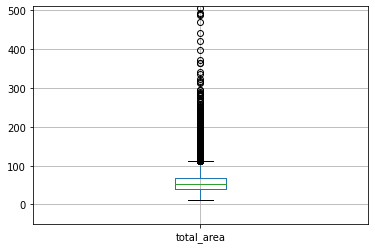

In [42]:
#Строим диаграмму размаха
#Building a scale diagram
df.boxplot('total_area')
plt.ylim(-50, 510)

(-50.0, 250.0)

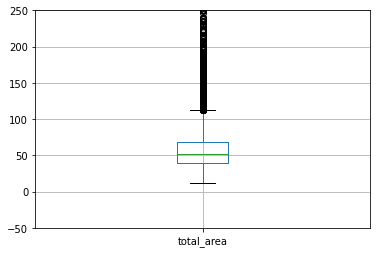

In [43]:
df.boxplot('total_area')
plt.ylim(-50, 250)

На диаграмме размаха наблюдаются выбросы (при увиличенном масштабе) примерно от 115 метров, которые имеют большое количество и расположены очень плотно к друг другу.
___
The scale diagram shows emissions (at an exaggerated scale) from about 115 meters, which have a large number and are located very close to each other.

Text(0, 0.5, 'Количество квартир')

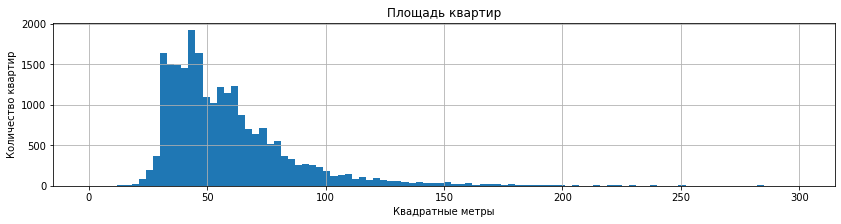

In [44]:
#строим гигстограмму
#building a gigstogram
pd.Series(df['total_area']).hist(bins=100, figsize=(14,3), range=(0, 300))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')

In [45]:
#удаляем выбросы

#сначала столбец rooms переводим в формат int64
#first, we convert the rooms column to int64 format
#df['rooms'] = pd.to_numeric(df['rooms']) 

#передаем в Dataframe отфильтрованные строки
#passing the filtered strings to the Dataframe
df = df.loc[(df['total_area'] > 17) & (df['total_area'] < 180)]
df.reset_index(inplace=True, drop=True)

Text(0, 0.5, 'Количество квартир')

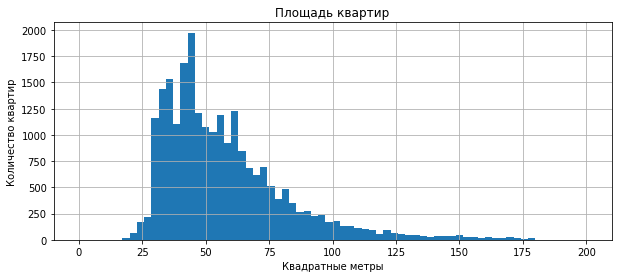

In [46]:
#строим гигстограмму
#building a gigstogram
df['total_area'].hist(bins=70, figsize=(10,4), range=(0, 200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')

Гистограмма стала более информативной когда исклюены слишком большие значения площади. Так, мы явно наблюдаем, что наибольшее количество квартир представлено в диапазоне от примерно 27 до 45 метров.
___

The histogram has become more informative when too large area values are excluded. So, we clearly observe that the largest number of apartments is represented in the range from about 27 to 45 meters.

In [47]:
print(df['is_apartment'].unique())

[nan False True]


In [48]:
#заменяем nan на False так как на практике апартаменты занимают малую долю. 
#Следовательно большой объем ропусков по данному столбцу означают, что это не аппартаменты.

#replace nan on False since in practice apartments occupy a small share. 
#Therefore, a large volume of releases for this column means that these are not apartments.

df['is_apartment'] = df['is_apartment'].fillna(False)
print(df['is_apartment'].unique())
print(df['is_apartment'].isna().sum())

[False  True]
0


In [49]:
print(df['kitchen_area'].isna().sum())
print(df['kitchen_area'].unique())

2225
[25.   11.    8.3    nan 41.    9.1  14.4  18.9   8.81  6.5   8.5   6.
  9.    5.2   8.    7.6   5.6  12.    5.7   6.1  19.6  15.    7.    9.2
 11.7  13.4  17.    6.3  11.6   8.8  10.   17.6   7.5   9.5  50.   15.5
 10.7  11.1  20.   11.9  16.    5.3  11.5   7.2   6.2  10.4   7.1   4.9
  7.3  11.95 10.2   6.4   5.5  13.    8.4  23.6  10.8  18.3   5.    8.2
 23.8  24.    6.6  26.85 15.4   7.8  33.8   5.4  12.72 12.2  19.   12.4
  7.9  10.3   9.8  17.5  14.7  20.91 21.3  10.6  10.9   9.7   7.7  12.5
 11.4   8.6  11.24 14.1  15.7  13.29 14.   12.9  12.7  16.5   9.36 21.5
 35.   10.5   8.7  19.3  21.4  40.   49.2  11.52  8.9   9.6  30.   14.2
  8.1  10.44  4.5  16.3  11.2  18.4   7.4  11.3   9.4  13.1  10.19  7.06
 22.   36.    5.1  18.7   9.9  14.3  18.   23.   19.4  11.8  13.3  17.7
 23.1  10.63 11.33 13.5  19.5  13.2  17.2  13.8  12.3   9.3   5.8  12.88
  9.28 16.1  14.5  31.    5.9  10.1  23.4  19.2  28.6  15.1   8.98 10.59
 17.9  16.8  11.27 16.74  9.57 23.43 15.2   8.07 12.24 13

In [50]:
#проверяем, действительно ли общая площадь квартиры больше, чем площадь кухни в значении от 100 метров
#если да, то это данные можно считать достоверными

#we check whether the total area of the apartment is really larger than the area of the kitchen in the value of 100 meters
#if yes, then this data can be considered reliable
#df[df['kitchen_area'] >= 100]

#так как удалили квартиры с большой площадью, то теперь таких строк нет и код неактуален
#since apartments with a large area were deleted, now there are no such lines and the code is irrelevant

In [51]:
print(df['balcony'].unique())

[nan  2.  0.  1.  5.  4.  3.]


In [52]:
#В столбце 'balcony' не указали данные, то вероятно, что балконов и нет. 
#Заменяем пропуски на 0, изменяем тип данных на int, так как должно быть целое число.

#No data was specified in the 'balcony' column, then it is likely that there are no balconies. 
#Replace the omissions with 0, change the data type to int, since it should be an integer.

df['balcony'] = df['balcony'].fillna(0).astype(int)
print(df['balcony'].unique())

[0 2 1 5 4 3]


In [53]:
#ПАРАМЕТР 4 - БАЛКОНЫ
df['balcony'].describe() 



count    23304.000000
mean         0.595048
std          0.960211
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

(-1.0, 6.0)

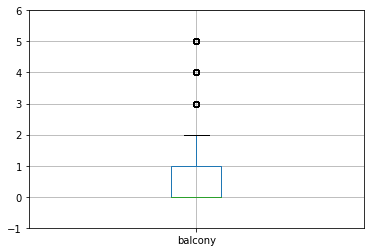

In [54]:
df.boxplot('balcony')
plt.ylim(-1, 6)



Text(0, 0.5, 'Количество квартир')

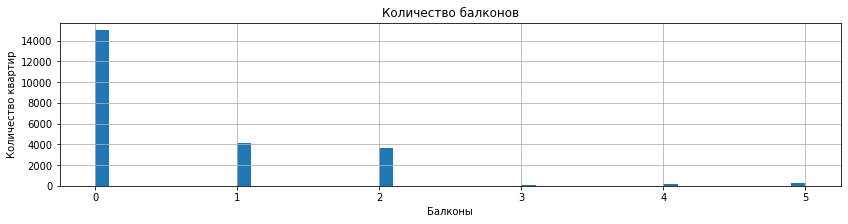

In [55]:
#строим гигстограмму
pd.Series(df['balcony']).hist(bins=50, figsize=(14,3), range=(0,5))
plt.title('Количество балконов')
plt.xlabel('Балконы')
plt.ylabel('Количество квартир')

In [56]:
print(len(df['locality_name'].unique()))

364


In [57]:
print(df['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [58]:
#заменяем в наименовании названий 'посёлок ' на 'поселок ' так как встречаются оба варианта написания
##we replace 'settlement' with 'settlement' in the name of the names , since both spellings occur

df['locality_name'] = df['locality_name'].str.replace('посёлок ', 'поселок ')

In [59]:
print(df['locality_name'].unique())

['Санкт-Петербург' 'поселок Шушары' 'городской поселок Янино-1'
 'поселок Парголово' 'поселок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'деревня Фёдоровское'
 'Выборг' 'Кронштадт' 'Кировск' 'деревня Новое Девяткино'
 'поселок Металлострой' 'поселок городского типа Лебяжье'
 'поселок городского типа Сиверский' 'поселок Молодцово'
 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'поселок Аннино' 'поселок городского типа Ефимовский'
 'поселок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'поселок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'поселок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'деревня Оржицы' 'деревня Кальтино'

In [60]:
#определяем долю пропусков по тем столбцам, где они имеются
#we determine the proportion of omissions by those columns where they are available

(df.loc[:, df.columns[df.isna().any()]].isna().sum() / len(df)) * 100

floors_total             0.360453
living_area              7.964298
kitchen_area             9.547717
locality_name            0.210264
airports_nearest        23.725541
city_centers_nearest    23.639719
parks_around_3000       23.635427
parks_nearest           66.439238
ponds_around_3000       23.635427
ponds_nearest           62.049434
days_exposition         13.229488
dtype: float64

In [61]:
print(df['airports_nearest'].unique())

[18863. 12817. 21741. ... 11751. 20151. 24665.]


Не заполняем эти пропуски так как не можем достоверно восстановить их

в колонке city_centers_nearest Не заполняем эти пропуски так как не можем достоверно восстановить их

в колонке parks_nearest Не заполняем эти пропуски так как не можем достоверно восстановить их

в колонке ponds_nearest Не заполняем эти пропуски так как не можем достоверно восстановить их

In [62]:
print(df['parks_around_3000'].unique())

[ 1.  0.  2. nan  3.]


In [63]:
#заменяем пропуск на 0, так как этот вариант уже имеется, то можно предположить, что пропуск обозначает 0
#replace the pass with 0, since this option is already available, we can assume that the pass means 0
df['parks_around_3000'] = df['parks_around_3000'].fillna(0).astype(int) 
display(df['parks_around_3000'].isna().sum()) 

0

In [64]:
#заменяем пропуск на 0, так как этот вариант уже имеется, то можно предположить, что пропуск обозначает 0
#replace the pass with 0, since this option is already available, we can assume that the pass means 0
df['ponds_around_3000'] = df['ponds_around_3000'].fillna(0).astype(int) 
display(df['ponds_around_3000'].isna().sum())

0

In [65]:
(df.loc[:, df.columns[df.isna().any()]].isna().sum() / len(df)) * 100

floors_total             0.360453
living_area              7.964298
kitchen_area             9.547717
locality_name            0.210264
airports_nearest        23.725541
city_centers_nearest    23.639719
parks_nearest           66.439238
ponds_nearest           62.049434
days_exposition         13.229488
dtype: float64

In [66]:
df['days_exposition'] = df['days_exposition'].fillna(0).astype(int)
print(df['days_exposition'].unique())

[   0   81  558 ... 1360 1007  971]


Пропуски в столбце `days_exposition` вероятно связаны с тем, что объявление еще активно. 
Лучше этот пропуск лучше не трогать, но я его заменяю на 0, чтобы поменять тип днных на int

#### Вывод
* Переименованы столбцы `city_centers_nearest`, `parks_around_3000`, `ponds_around_3000`.

* Заменены пропущенные значения в 11 колонках:
`ceiling_height, is_apartment, balcony, parks_around_3000, ponds_around_3000`.

* формат даты-времени в столбце `first_day_exposition` приведен в "читаемый" вид.

* обнаруженные NaN заполнены медианными значениями.

* Пропусков по столбцу `rooms` изначально не было, однако 0 - это 0 комнат , что характерно для планировок типа опен-план или студий. Как правило, считают только жилые комнаты. Учитывая это, квартиры типа опен-спейс или студии сами по-себе представляют одну большую комнату, то логичнее было прировнять "нулевые" квартиры к квартирам с 1 комнатой. Тем более, площадь таких комнат не более 40 кв.м., что видно в столбце `total_area`.

* Среди редких значений указаны высота потолков 20, 22.6, 24, 25, 26, 27 м и 32 м. Логично было предположить, что на самом деле это вещественные значения, например 2.4 м и 3.2 м. Что касается таких выбивающихся значений как 100 м, 14 м, 10.3, то удалять их не нужно поскольку квартира не может быть без потолка - они приранены к медианным значениям.

* В столбце `balcony` пропуски говорят о том, что вероятно балконов нет, поэтому они заменены на 0. Также изменен тип данных на int, так как должно быть целое число.

* Пропуски в столбце `days_exposition` вероятно связаны с тем, что объявление еще активно. Принято решение заменить пропуски на 0.

* Заменены в наименовании названий 'посёлок ' на 'поселок ' так как встречаются оба варианта написания - это неявные дубликаты в названиях населённых пунктов.
___
* Renamed columns `city_centers_nearest', `parks_around_3000', `ponds_around_3000'.

* Replaced missing values in 11 columns:
`ceiling_height, is_apartment, balcony, parks_around_3000, ponds_around_3000`.

* the date-time format in the `first_day_exposition` column is given in a "readable" form.

* detected NaN are filled with median values.

* Initially there were no gaps in the `rooms` column, but 0 is 0 rooms, which is typical for open-plan layouts or studios. As a rule, only living rooms are considered. Considering this, apartments like open space or studios themselves represent one large room, it was more logical to equate "zero" apartments to apartments with 1 room. Moreover, the area of such rooms is no more than 40 sq.m., as can be seen in the `total_area` column.

* Among the rare values are the ceiling height 20, 22.6, 24, 25, 26, 27 m and 32 m. It was logical to assume that in fact these are real values, for example 2.4 m and 3.2 m. As for such knockout values as 100 m, 14 m, 10.3, it is not necessary to remove them because the apartment cannot be without a ceiling - they are attached to the median values.

* In the `balcony` column, the omissions indicate that there are probably no balconies, so they are replaced with 0. The data type has also been changed to int, since there should be an integer.

* The omissions in the `days_exposition` column are probably due to the fact that the ad is still active. It was decided to replace the omissions with 0.

* Replaced in the name of the names 'посёлок ' by 'поселок ' since both spellings occur - these are implicit duplicates in the names of localities

### Посчитайте и добавьте в таблицу новые столбцы

In [67]:
#Добавляем столбец со стоимостью квадратного метра metr_price и приводим его в целочисленный тип
#Add a column with the cost per square meter metr_price and convert it to an integer type
df['metr_price'] = (df['last_price'] / df['total_area']).astype(int)
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,metr_price
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0,120370
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785


In [68]:
#Добавляем столбцы дня недели - weekday, месяца - month и года - year
#Adding columns of the day of the week - weekday, month - month and year - year
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,metr_price,weekday,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1,482.0,2,755.0,0,120370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,18603.0,0,NaN,0,NaN,81,82920,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,13933.0,1,90.0,2,574.0,558,92785,3,8,2015


In [69]:
#Создаём функцию для заполнения нового столбца с типом этажа
#Creating a function to fill in a new column with the floor type
def floor_sort(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['floor_types'] = df.apply(floor_sort, axis=1) #добавление столбца в таблицу
df.head(3) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,metr_price,weekday,month,year,floor_types
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,1,482.0,2,755.0,0,120370,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,0,NaN,0,NaN,81,82920,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,1,90.0,2,574.0,558,92785,3,8,2015,другой


In [70]:
#находим среднюю общую площадь там, где пропущенные в жилой площади
#find the average total area where the missing in the living area
total_area_mean = df['total_area'].where(df['living_area'].isnull() == False).mean()

#находим среднюю площадь в жилой площади
#find the average area in the living area
living_area_mean = df['living_area'].mean()

#коэффициент
#ratio
r = total_area_mean/living_area_mean
living_area_fill = df['total_area'] / r

#заполняем пропуски в living_area
#filling in the gaps in living_area
df['living_area'] = df['living_area'].fillna(living_area_fill)

#Добавляем столбец с отношением жилой площади к общей - ratio_area
#Adding a column with the ratio of the living area to the total - ratio_area
df['ratio_area'] = ((df['living_area'] / df['total_area'])* 100).astype(int)
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,metr_price,weekday,month,year,floor_types,ratio_area
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,482.0,2,755.0,0,120370,3,3,2019,другой,47
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,...,NaN,0,NaN,81,82920,1,12,2018,первый,46
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,90.0,2,574.0,558,92785,3,8,2015,другой,61
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,90.920178,9,False,...,84.0,3,234.0,424,408176,4,7,2015,другой,57
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,112.0,1,48.0,121,100000,1,6,2018,другой,32


In [71]:
#находим среднюю общую площадь там, где пропущенные в kitchen_area
#find the average total area where the missing in the kitchen_area
total_kitchen_mean = df['total_area'].where(df['kitchen_area'].isnull() == False).mean()

#находим среднюю площадь в жkitchen_area
#find the average area in the kitchen_area
kitchen_mean = df['kitchen_area'].mean()

#коэффициент
#ratio
r = total_kitchen_mean / kitchen_mean
kitchen_area_fill = df['total_area'] / r

#заполняем пропуски в living_area
#filling in the gaps in living_area
df['kitchen_area'] = df['kitchen_area'].fillna(kitchen_area_fill)

#Добавляем столбец с отношением площади кухни к общей - kitchen_ratio
#Adding a column with the ratio of the kitchen area to the total - kitchen_ratio
df['kitchen_ratio'] = ((df['kitchen_area'] / df['total_area'])* 100).astype(int) 
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,metr_price,weekday,month,year,floor_types,ratio_area,kitchen_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2,755.0,0,120370,3,3,2019,другой,47,23
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,0,NaN,81,82920,1,12,2018,первый,46,27
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,2,574.0,558,92785,3,8,2015,другой,61,14


#### Вывод
Добавлены дополнительные столбцы в таблицу:
цена квадратного метра `metr_price`;

день недели, месяц и год публикации объявления `weekday`,	`month`, `year`;

соотношение жилой и общей площади `floor_types`, а также отношение площади кухни к общей`kitchen_ratio`.

Прописана функция для сортировки квартир по этажам в следующих вариантах: первый, последний, другой c с добавлением в новый столбец `floor_types`
___
Added additional columns to the table:
price per square meter `metr_price`;

day of the week, month and year of publication of the ad `weekday`, `month`, `year`;

the ratio of residential and total area `floor_types', as well as the ratio of kitchen area to total 'kitchen_ratio'.

There is a function for sorting apartments by floors in the following variants: first, last, other c with the addition of `floor_types` to a new column

### Проведите исследовательский анализ данных

In [72]:
#РАСПОЛОЖЕНИЕ ОТ ЦЕНТРА
df['city_centers_nearest'] = df['city_centers_nearest'] / 1000
df['city_centers_nearest'].describe()

count    17795.000000
mean        14.346505
std          8.574413
min          0.181000
25%          9.549500
50%         13.205000
75%         16.378500
max         65.968000
Name: city_centers_nearest, dtype: float64

(-1.0, 68.0)

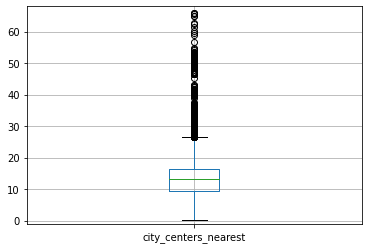

In [73]:
df.boxplot('city_centers_nearest')
plt.ylim(-1, 68)

Text(0, 0.5, 'Количество квартир')

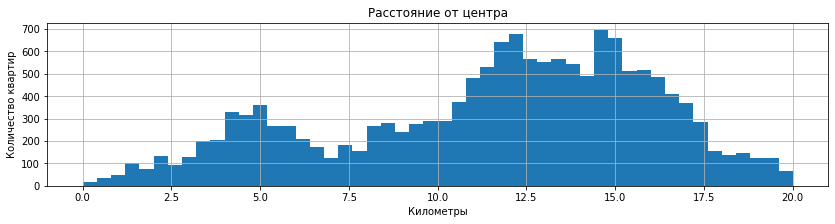

In [74]:
#строим гигстограмму
#building a gigstogram
pd.Series(df['city_centers_nearest']).hist(bins=50, figsize=(14,3), range=(0,20))
plt.title('Расстояние от центра')
plt.xlabel('Километры')
plt.ylabel('Количество квартир')

Наибольшее количество квартир расположено в 12 и в 14,5 км. от центра.
Интересно посмотреть на взаимосвязь со стоимостью.
___
The largest number of apartments is located in 12 and 14.5 km from the center.
It is interesting to look at the relationship with cost.

In [75]:
#ВЫСОТА ПОТОЛКОВ
df['ceiling_height'].describe() 

count    23304.000000
mean         2.690240
std          0.202973
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

(1.5, 5.0)

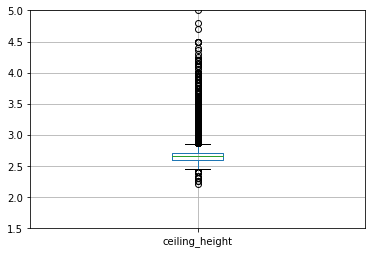

In [76]:
df.boxplot('ceiling_height')
plt.ylim(1.5, 5)

Text(0, 0.5, 'Количество квартир')

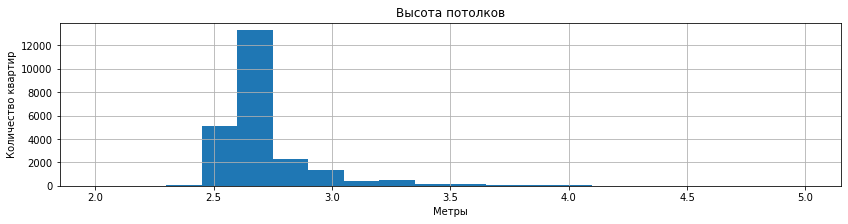

In [77]:
#строим гигстограмму
pd.Series(df['ceiling_height']).hist(bins=20, figsize=(14,3), range=(2,5))
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')

В целом, после предобработки, большая часть квартир имеет высоту потолков ближе к стандартной.
Также интересно посмотреть на взаимосвязь цены от высоты потолков.
___
In general, after pre-processing, most of the apartments have a ceiling height closer to the standard.
It is also interesting to look at the relationship between the price and the ceiling height.

In [78]:
#ЭТАЖ
df['floor'].describe()

count    23304.000000
mean         5.911861
std          4.896907
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

(1.0, 33.0)

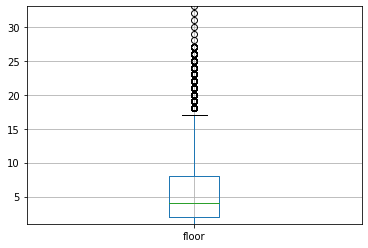

In [79]:
df.boxplot('floor')
plt.ylim(1, 33)

(1.0, 18.0)

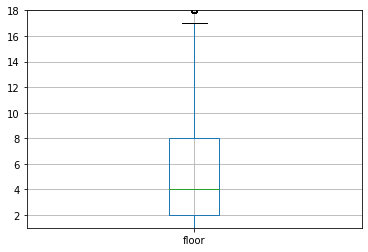

In [80]:
df.boxplot('floor')
plt.ylim(1, 18)

Text(0, 0.5, 'Количество квартир')

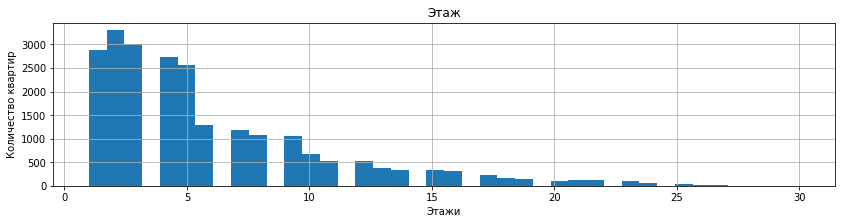

In [81]:
#строим гигстограмму
pd.Series(df['floor']).hist(bins=40, figsize=(14,3), range=(1,30))
plt.title('Этаж')
plt.xlabel('Этажи')
plt.ylabel('Количество квартир')

Большая доля квартир находится в пределах 5 этажей.
___
A large proportion of apartments are located within 5 floors.

In [82]:
#ЖИЛАЯ ПЛОЩАДЬ
df['living_area'].describe()

count    23304.000000
mean        32.858484
std         16.262504
min          2.000000
25%         19.000000
50%         30.000000
75%         41.800000
max        140.000000
Name: living_area, dtype: float64

(1.0, 100.0)

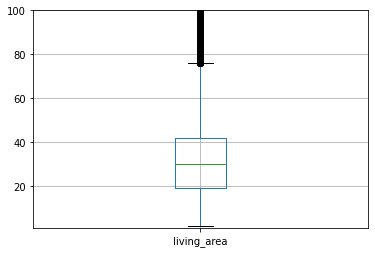

In [83]:
df.boxplot('living_area')
plt.ylim(1, 100)

Text(0, 0.5, 'Количество квартир')

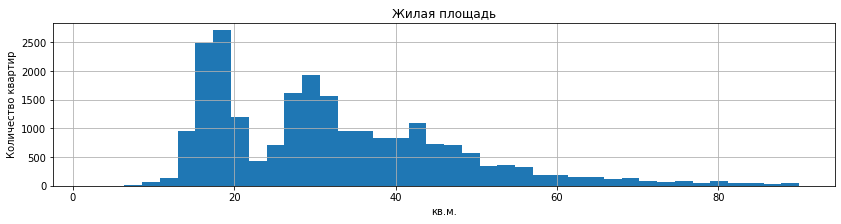

In [84]:
#строим гигстограмму
#building a gigstogram
pd.Series(df['living_area']).hist(bins=40, figsize=(14,3), range=(2,90))
plt.title('Жилая площадь')
plt.xlabel('кв.м.')
plt.ylabel('Количество квартир')

Максимальная доля квартир по критерию жилая площадь определена в районе 16-19 метрах (от 2500 квартир).

Около 1900 квартир имеют жилую площадь в районе 30 квадратных метров, что составляет медианное значение.
___
The maximum share of apartments according to the criterion of living space is determined in the area of 16-19 meters (from 2500 apartments).

About 1,900 apartments have a living area of around 30 square meters, which is the median value.

In [85]:
#ПЛОЩАДЬ КУХНИ
df['kitchen_area'].describe()

count    23304.000000
mean        10.234215
std          5.193188
min          1.300000
25%          7.000000
50%          9.000000
75%         11.754769
max         93.000000
Name: kitchen_area, dtype: float64

(1.0, 100.0)

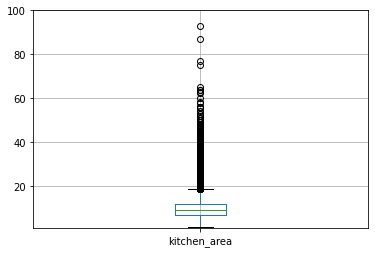

In [86]:
df.boxplot('kitchen_area')
plt.ylim(1, 100)

При расчете коэффициента площади кужни к общей площади через среднее значение было произведено заполнение пропусков. В связи с этим, выбивающиеся значения можем удалить, поскольку наиболее вероятно, что квартиры с площадью кухни более 60 метров имеют отношение к элитной недвижимости.
___
When calculating the coefficient of the area of kuzhnya to the total area, gaps were filled in through the average value. In this regard, we can remove the missing values, since it is most likely that apartments with a kitchen area of more than 60 meters are related to luxury real estate.

In [87]:
#удаляем выбросы
#removing outliers
#передаем в Dataframe отфильтрованные строки
#passing the filtered strings to the Dataframe
df = df.loc[(df['kitchen_area'] < 60)]
df.reset_index(inplace=True, drop=True)

Text(0, 0.5, 'Количество квартир')

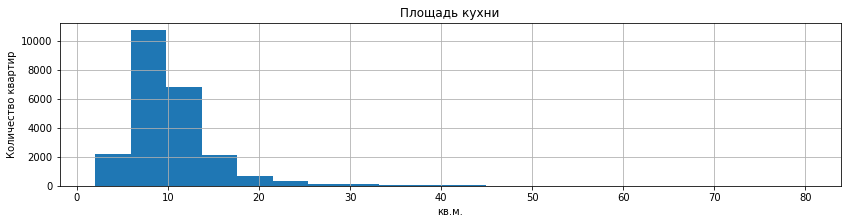

In [88]:
#строим гигстограмму
#building a gigstogram
pd.Series(df['kitchen_area']).hist(bins=20, figsize=(14,3), range=(2, 80))
plt.title('Площадь кухни')
plt.xlabel('кв.м.')
plt.ylabel('Количество квартир')

Большая часть квартир имеет площадь кухни не более 9 квадратных метров.
___
Most of the apartments have a kitchen area of no more than 9 square meters.

In [89]:
#ПАРКИ В ПРЕДЕЛАХ 3 КМ.
df['parks_around_3000'].describe()

count    23294.000000
mean         0.457113
std          0.735969
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around_3000, dtype: float64

(-1.0, 4.0)

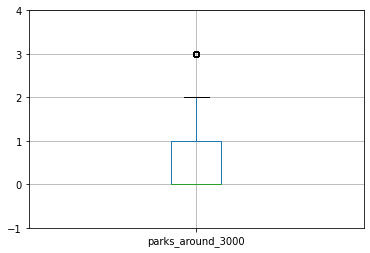

In [90]:
df.boxplot('parks_around_3000')
plt.ylim(-1, 4)

Text(0, 0.5, 'Количество квартир')

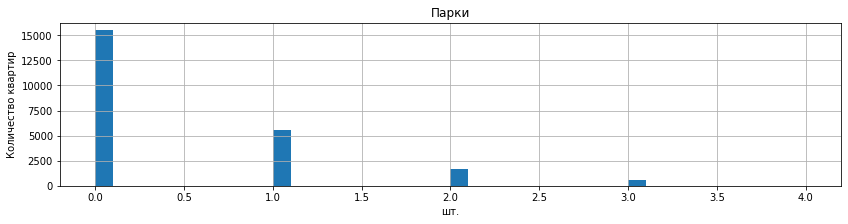

In [91]:
#строим гигстограмму
pd.Series(df['parks_around_3000']).hist(bins=40, figsize=(14,3), range=(0, 4))
plt.title('Парки')
plt.xlabel('шт.')
plt.ylabel('Количество квартир')

Отсутствие парков влияет на качество жизни не в лучшую сторону. Интересно, как далеко такие квартиры расположены от центра? Или вероятно это спальные районы в центре или отдаленные объекты без благоустроенной инфраструктуры для жизни.
___
The lack of parks does not affect the quality of life for the better. I wonder how far such apartments are located from the center? Or perhaps these are residential areas in the center or remote objects without a well-maintained infrastructure for life.

In [92]:
#ПРУДЫ В ПРЕДЕЛАХ 3 КМ.
df['ponds_around_3000'].describe()

count    23294.000000
mean         0.579677
std          0.875145
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around_3000, dtype: float64

(-1.0, 4.0)

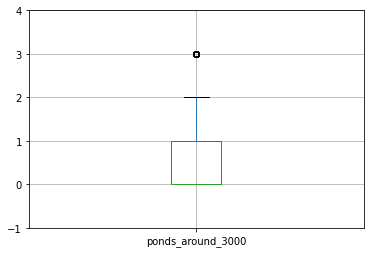

In [93]:
df.boxplot('ponds_around_3000')
plt.ylim(-1, 4)

Text(0, 0.5, 'Количество квартир')

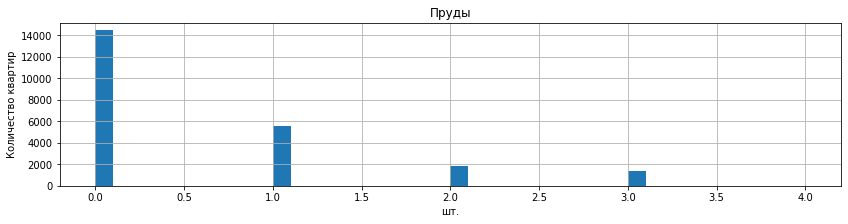

In [94]:
#строим гигстограмму
#building a gigstogram
pd.Series(df['ponds_around_3000']).hist(bins=40, figsize=(14,3), range=(0, 4))
plt.title('Пруды')
plt.xlabel('шт.')
plt.ylabel('Количество квартир')

Аналогичный вывод можно сделать и в отношении прудов. Однако, отсутствие пруда рядом с квартирой наврядли будет влиять на цену с точки зрения ее удешевления, так как на стоимость квадратного метра в большей степени влияют другие факторы, один из которых например, близость к центру, где стоимость квадратного метра одна из самых высоких. Но при том, квартиры с наличием пруда (при прочих равных условиях) в ближайшей доступности будут в большем спросе и одновременно иметь более высокую цену, по сравнению с аналогичными объектами без прудов.
___
A similar conclusion can be drawn with regard to ponds. However, the absence of a pond next to the apartment is unlikely to affect the price in terms of its cheapening, since the cost per square meter is more influenced by other factors, one of which is, for example, proximity to the center, where the cost per square meter is one of the highest. But at the same time, apartments with a pond (all other things being equal) in the immediate vicinity will be in greater demand and at the same time have a higher price compared to similar objects without ponds.

In [95]:
#АЭРОПОРТ
df['airports_nearest'].describe()

count    17766.000000
mean     28847.684566
std      12704.752188
min          0.000000
25%      18488.000000
50%      26891.500000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64

(0.0, 88000.0)

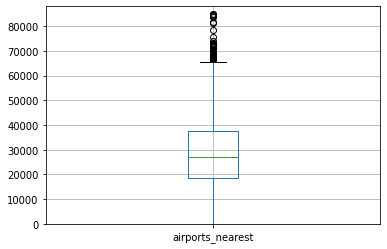

In [96]:
df.boxplot('airports_nearest')
plt.ylim(0, 88000)

Text(0, 0.5, 'Количество квартир')

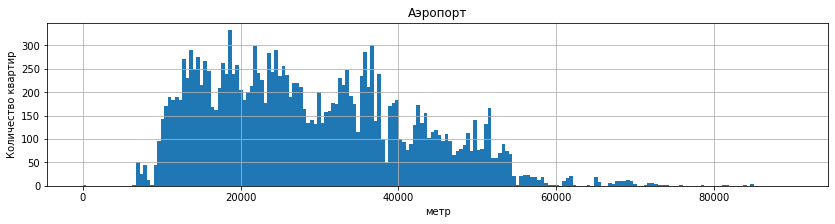

In [97]:
#строим гигстограмму
#building a gigstogram
pd.Series(df['airports_nearest']).hist(bins=200, figsize=(14,3), range=(0, 90000))
plt.title('Аэропорт')
plt.xlabel('метр')
plt.ylabel('Количество квартир')

Медианное значение представлено на расстоянии около 27 км от аэропорта.

Поскольку имеются пропуски, которые оставлены без изменения по причине трудоемкости, то исследуем этот показатель в общих чертах. Так, получается, что большая часть квартир расположена в пределах 12-37 км.
___
The median value is represented at a distance of about 27 km from the airport.

Since there are omissions that are left unchanged due to labor intensity, we will investigate this indicator in general terms. So, it turns out that most of the apartments are located within 12-37 km.

**ИССЛЕДОВАНИЕ ВРЕМЕНИ ПРОДАЖИ КВАРТИРЫ**

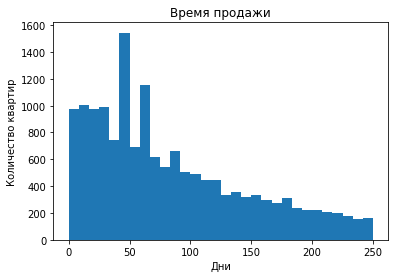

In [98]:
#Отбрасываем маркеры пустых значений
#print('Время продажи (медиана):', round(df.query('days_exposition')['days_exposition'].median()),'\n')
#print('Время продажи (среднее):', round(df.query('days_exposition')['days_exposition'].mean()),'\n')
#Гистограма времени продажи
plt.hist(df.query('days_exposition !=0')['days_exposition'], bins=30, range=(0,250))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()

In [99]:
# Изучаем значения срока продажи
df = df.loc[(df['days_exposition'] != 0)]
df['days_exposition'].describe()

count    20213.000000
mean       179.171919
std        217.738291
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

Без учета объявлений со значением 0 (мы предположили, что данные объявления могут быть действующими) - медианное время продажи - 95 дней. Среднее время продажи - 179 дня.
В основном квартиры продаются за срок в 60-100 дней. Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев.

Быстрой продажей можно назвать срок до 45 дней и меньше. Долгой продажей - 229 дней (больше 7 месяцев) и дольше.
___
Excluding ads with a value of 0 (we assumed that these ads may be valid) - the median time of sale is 95 days. The average time of sale is 179 days.
Basically, apartments are sold for a period of 60-100 days. There are a large number of apartments sold in just a few days after publication. And there are also options that have been on sale for several tens of months.

A quick sale can be called a period of up to 45 days or less. Long sale - 229 days (more than 7 months) and longer.

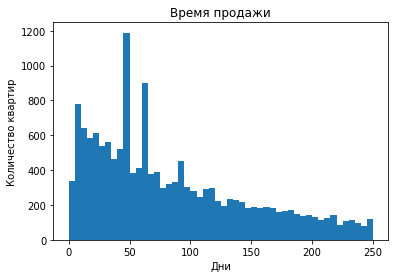

In [100]:
plt.hist(df.query('days_exposition !=0')['days_exposition'], bins=50, range=(0,250))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()

In [101]:
# Функция для подсчёта границ с учетом 1.5 размаха
def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq
# Столбцы с выбросами
list_features = ['days_exposition',]
for col in list_features:
    df[col] = quartile_range(df, col)

# Изучаем, есть ли выбивающиеся значения
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,metr_price,weekday,month,year,ratio_area,kitchen_ratio
count,20213.000000,2.021300e+04,20213.000000,20213.000000,20213.000000,20137.000000,20213.000000,20213.000000,20213.000000,20213.000000,...,6731.000000,20213.000000,7691.000000,18546.000000,20213.000000,20213.000000,20213.000000,20213.000000,20213.000000,20213.000000
mean,9.581507,5.632806e+06,56.292854,1.984169,2.684943,10.919998,32.114744,6.006036,10.087286,0.594667,...,491.743129,0.578539,522.902093,127.034239,96564.270667,2.585762,6.586454,2017.219413,55.850888,18.381735
std,5.634924,4.638470e+06,23.955279,0.928871,0.192954,6.664084,15.765730,4.953561,4.807591,0.948822,...,344.963414,0.871367,276.736027,119.551889,38939.736900,1.785479,3.486837,0.965717,10.029628,6.841128
min,0.000000,4.300000e+05,17.200000,1.000000,2.200000,1.000000,2.000000,1.000000,2.000000,0.000000,...,1.000000,0.000000,13.000000,1.000000,7962.000000,0.000000,1.000000,2014.000000,2.000000,4.000000
25%,6.000000,3.400000e+06,39.300000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,...,287.000000,0.000000,303.000000,41.000000,76315.000000,1.000000,3.000000,2017.000000,50.000000,14.000000
50%,9.000000,4.500000e+06,50.200000,2.000000,2.650000,9.000000,29.700000,4.000000,9.000000,0.000000,...,453.000000,0.000000,507.000000,84.000000,93750.000000,3.000000,7.000000,2017.000000,57.000000,17.000000
75%,13.000000,6.390000e+06,66.900000,3.000000,2.700000,16.000000,40.700000,8.000000,11.520000,1.000000,...,615.000000,1.000000,733.000000,181.000000,111764.000000,4.000000,10.000000,2018.000000,62.000000,22.000000
max,50.000000,9.800000e+07,179.700000,5.000000,5.000000,60.000000,140.000000,33.000000,58.400000,5.000000,...,3190.000000,3.000000,1344.000000,504.000000,719298.000000,6.000000,12.000000,2019.000000,100.000000,78.000000


In [102]:
df[df['rooms'] > 5]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,metr_price,weekday,month,year,floor_types,ratio_area,kitchen_ratio


Text(0, 0.5, 'Количество квартир')

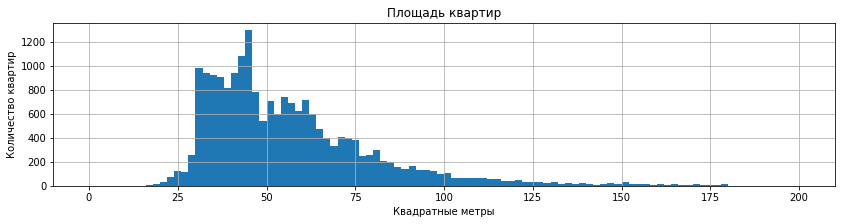

In [103]:
pd.Series(df['total_area']).hist(bins=100, figsize=(14,3), range=(0, 200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')

В датафрейме отброшены значения на основе 1.5 размаха. Значения стали лучше и адекватнее.
___

In the dataframe, values based on the 1.5 span are discarded. The values have become better and more adequate.

**ФАКТОРЫ, БОЛЬШЕ ВСЕГО ВЛИЯЮЩИЕ НА СТОИМОСТЬ КВАРТИРЫ** 

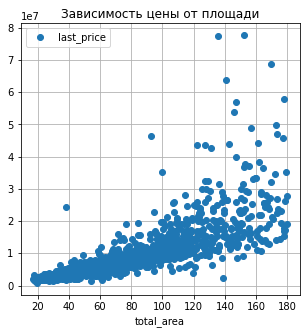

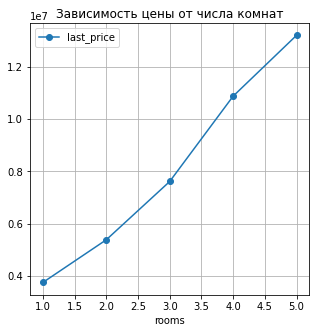

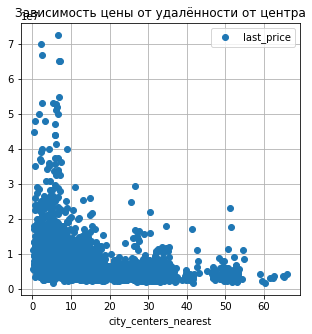

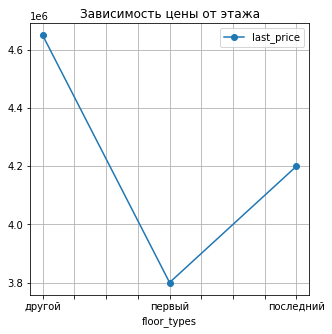

In [104]:
# Зависимость цены от площади
(
    df.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
    .set_title('Зависимость цены от площади')
)

# Зависимость цены от числа комнат
(
    df.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
    .set_title('Зависимость цены от числа комнат')
)

# Зависимость цены от удалённости от центра
(
    df.pivot_table(index='city_centers_nearest', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
    .set_title('Зависимость цены от удалённости от центра')
)

# Зависимость цены от этажа
(
    df.pivot_table(index='floor_types', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
    .set_title('Зависимость цены от этажа')
);

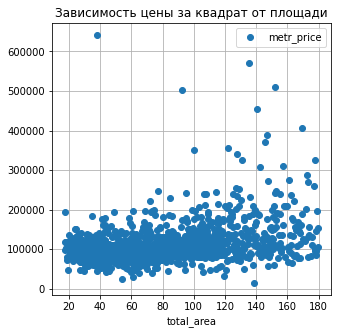

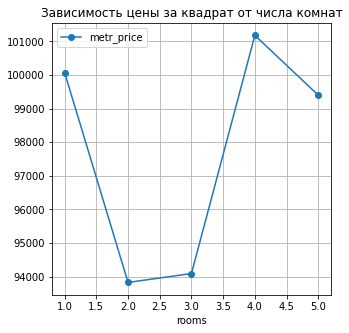

In [105]:
# Зависимость цены за квадрат от площади
(
    df.pivot_table(index='total_area', values='metr_price')
    .plot(grid=True, style='o', figsize=(5, 5))
    .set_title('Зависимость цены за квадрат от площади')
)

# Зависимость цены за квадрат от числа комнат
(
    df.pivot_table(index='rooms', values='metr_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
    .set_title('Зависимость цены за квадрат от числа комнат')
);

In [106]:
plt.show()
print('Корреляция цены и площади:','\n')
print(df.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')

Корреляция цены и площади: 

            last_price  total_area
last_price    1.000000    0.933526
total_area    0.933526    1.000000 



In [107]:
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(df.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

Корреляция цены и числа комнат: 

            last_price     rooms
last_price    1.000000  0.706234
rooms         0.706234  1.000000 



In [108]:
plt.show()
print('Корреляция цены и удалённости от центра:','\n')
print(df.pivot_table(index='floor', values=['city_centers_nearest', 'last_price']).corr(),'\n')

Корреляция цены и удалённости от центра: 

                      city_centers_nearest  last_price
city_centers_nearest               1.00000     0.35697
last_price                         0.35697     1.00000 



In [109]:
plt.show()
print('Корреляция цены за квадрат и площади:','\n')
print(df.pivot_table(index='floor', values=['total_area', 'metr_price']).corr(),'\n')

Корреляция цены за квадрат и площади: 

            metr_price  total_area
metr_price    1.000000   -0.138292
total_area   -0.138292    1.000000 



In [110]:
plt.show()
print('Корреляция цены за квадрат и числа комнат:','\n')
print(df.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'metr_price']).corr(),'\n')

Корреляция цены за квадрат и числа комнат: 

            metr_price     rooms
metr_price    1.000000 -0.411276
rooms        -0.411276  1.000000 



Чем больше площадь, тем выше стоимость. Корреляция этих параметров крайне высокая. Число комнат влияет на цену (больше комнат - больше цена), однако зависимость ниже, чем у площади. Можно сделать два вывода: бывают квартиры с большими по площади комнатами; квартиры в центре состоят из малого числа комнат, но стоят достаточно высоко.

Самые дорогие варианты квартир находятся в центре города, однако в центре также есть и достаточно дешёвые варианты.

Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.

Цена за квадрат выше у однокомнатных квартир и квартир с 4 и 5 комнатами. Последнее, вероятно, объясняется элитностью недвижимости.
___
The larger the area, the higher the cost. The correlation of these parameters is extremely high. The number of rooms affects the price (more rooms means more price), but the dependence is lower than that of the area. Two conclusions can be drawn: there are apartments with large rooms; apartments in the center consist of a small number of rooms, but they stand high enough.

The most expensive apartment options are located in the city center, but there are also quite cheap options in the center.

The first floor directly affects the cost of the apartment - on average, apartments on the 1st floor are much cheaper. The last floor is slightly more expensive. The highest cost for apartments located not on the 1st and not on the last floor.

The price per square meter is higher for one-room apartments and apartments with 4 and 5 rooms. The latter is probably due to the elite real estate.

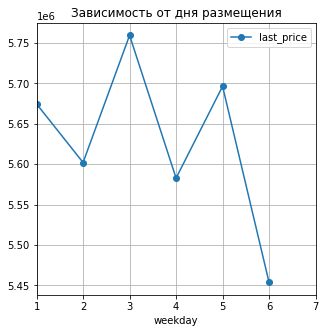

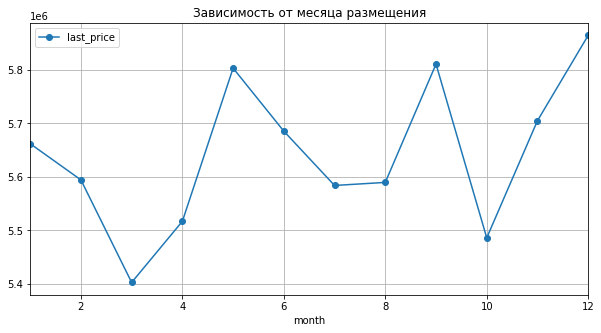

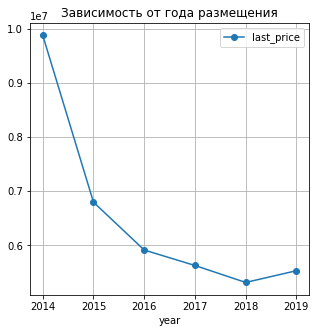

In [111]:
# Зависимость от дня размещения
(
    df.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,7), figsize=(5, 5))
    .set_title('Зависимость от дня размещения')
)
plt.show()
# Зависимость от месяца размещения
(
    df.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
    .set_title('Зависимость от месяца размещения')
)
plt.show()
# Зависимость от года размещения
(
    df.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
    .set_title('Зависимость от года размещения')
)
plt.show()

День недели: дороже всего квартиры, опубликованные в среду(вероятно по причине того, чтобы охватить максимально большую аудиторию, которая может увидеть объявления во второй половине недели), дешевле всего - в субботу (вероятно выходные дни влияют на лояльность продавцов).
Месяц: дороже всего квартиры, размещенные в декабре (видимо связано с началом финансового года, а также бюджета, утверждаемого с января, формирования розничных цен), дешевле всего - в марте (видимо возникает еобходимость побыстрее продать квартиру до периода отпусков).
Год: квартиры очень сильно подешевели в 2018 году, что, вероятно, вызвано некоторым кризисом 2016-2017 годов. В 2019 году цены стали подниматься, вероятно кризис стал стагнировать.
___
Day of the week: the most expensive apartments published on Wednesday (probably for the reason of reaching the largest possible audience that can see ads in the second half of the week), the cheapest - on Saturday (probably weekends affect the loyalty of sellers).
Month: the most expensive apartments placed in December (apparently due to the beginning of the fiscal year, as well as the budget approved from January, the formation of retail prices), the cheapest - in March (apparently there is a need to quickly sell the apartment before the holiday period).
Year: apartments have fallen in price very much in 2018, which is probably caused by some crisis of 2016-2017. In 2019, prices began to rise, probably the crisis began to stagnate.

**НАСЕЛЕННЫЕ ПУНКТЫ С САМОЙ ВЫСОКОЙ И НИЗКОЙ СТОИМОСТЬЮ ЖИЛЬЯ**

In [112]:
# Сравниваем среднюю стоимость квадратного метра в топ-10 городов по числу объявлений
city_top_ten = df['locality_name'].value_counts().head(10)
city_metr_price = df.query('locality_name in (@city_top_ten.index)').pivot_table(values='metr_price', index='locality_name')
city_metr_price = city_metr_price.astype(int)
city_metr_price.sort_values('metr_price', ascending=False)


,metr_price
locality_name,
Санкт-Петербург,110485
Пушкин,101819
деревня Кудрово,92473
поселок Парголово,89671
поселок Мурино,85742
поселок Шушары,77984
Колпино,74762
Всеволожск,68570
Гатчина,67927


**ЗАВИСИМОСТЬ ЦЕНЫ ОТ УДАЛЕННОСТИ ОТ ЦЕНТРА**

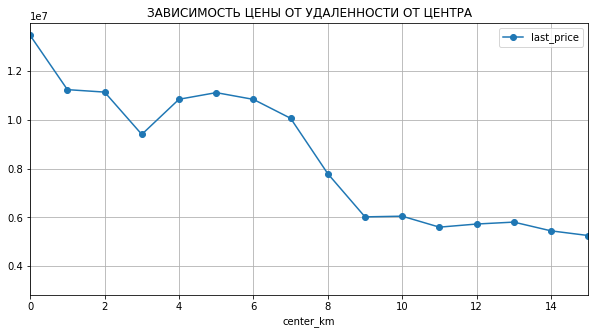

In [113]:
# Добавляем столбец с расстоянием до центра в км, округляем до целого
df['center_km'] = df['city_centers_nearest']
df['center_km'] = df['center_km'].fillna(value=0).astype(int)
# Выбираем Санкт-Петербург, смотрим на график, где указана средняя стоимость для каждого км
(
    df.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='center_km', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
    .set_title('ЗАВИСИМОСТЬ ЦЕНЫ ОТ УДАЛЕННОСТИ ОТ ЦЕНТРА')
)
plt.show()

Контрольная зона (центральный сегмент) - это 7 км и меньше. Дальше 7 км средняя цена на квартиры снижается.
___
The control zone (central segment) is 7 km or less. After 7 km, the average price of apartments decreases.

**АНАЛИЗ КВАРТИР В ЦЕНТРАЛЬНОМ СЕГМЕНТЕ**

Площадь (медиана): 53 

Площадь в центре (медиана): 77 

Площадь (среднее): 59 

Площадь в центре (среднее): 82 



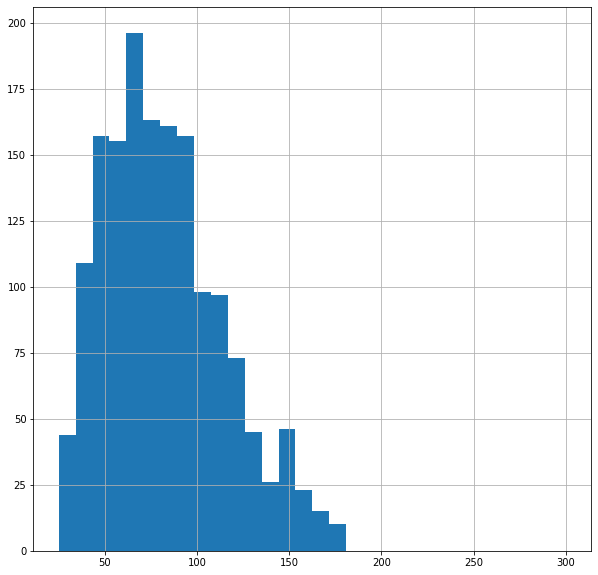

Число вариантов с ценой больше 20 млн: 120


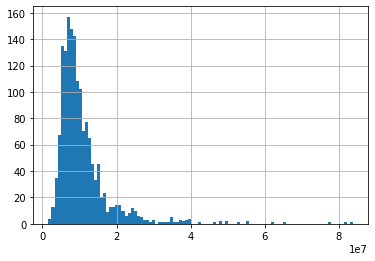

,count,rooms_ratio,center_count,center_rooms_ratio,center_cap
rooms,,,,,
1,4579,34.286784,352,16.176471,8.0
2,4458,33.380756,673,30.928309,15.0
3,3421,25.615874,704,32.352941,21.0
4,733,5.488581,324,14.889706,44.0
5,164,1.228004,123,5.652574,75.0


Высота потолков (медиана): 2.65 

Высота потолков в центре (медиана): 2.85 

Высота потолков (среднее): 2.705717708723325 

Высота потолков в центре (среднее): 2.9542785129174542 



In [114]:
spb_center = df.query('(locality_name == "Санкт-Петербург") & (center_km <= 4)')

# Изучаем площадь
print('Площадь (медиана):', round(df.query('locality_name == "Санкт-Петербург"')['total_area'].median()),'\n')
print('Площадь в центре (медиана):', round(spb_center['total_area'].median()),'\n')
print('Площадь (среднее):', round(df.query('locality_name == "Санкт-Петербург"')['total_area'].mean()),'\n')
print('Площадь в центре (среднее):', round(spb_center['total_area'].mean()),'\n')
spb_center['total_area'].hist(bins=30, range=(25,300), figsize=(10,10))
plt.show()

# Работаем со стоимостью
spb_center['last_price'].hist(bins=100)
print('Число вариантов с ценой больше 20 млн:', spb_center.query('last_price > 20000000')['last_price'].count())
plt.show()

# Изучаем число комнат
spb_rooms = df.query('(locality_name == "Санкт-Петербург") & (rooms > 0)').pivot_table(index='rooms', values='floor', aggfunc='count')
spb_rooms.columns = ['count']
spb_rooms['rooms_ratio'] = spb_rooms['count'] / spb_rooms['count'].sum() * 100
spb_rooms_center = df.query('(locality_name == "Санкт-Петербург") & (center_km <= 5)  & (rooms > 0)').pivot_table(index='rooms', values='floor', aggfunc='count')
spb_rooms_center.columns = ['center_count']
spb_rooms_center['center_rooms_ratio'] = spb_rooms_center['center_count'] / spb_rooms_center['center_count'].sum() * 100
rooms_alldata = pd.merge(spb_rooms, spb_rooms_center, 'left', on = 'rooms')
rooms_alldata['center_cap'] = round(rooms_alldata['center_count'] / rooms_alldata['count'] * 100)
display(rooms_alldata)

# Изучаем высоту потолков
print('Высота потолков (медиана):', df.query('locality_name == "Санкт-Петербург"')['ceiling_height'].median(),'\n')
print('Высота потолков в центре (медиана):', spb_center['ceiling_height'].median(),'\n')
print('Высота потолков (среднее):', df.query('locality_name == "Санкт-Петербург"')['ceiling_height'].mean(),'\n')
print('Высота потолков в центре (среднее):', spb_center['ceiling_height'].mean(),'\n')

Площадь квартир в центре больше, чем в целом по городу - в среднем около 30 метров. Также в центре находится большое число квартир с огромной площадью (100 квадратных метров и более).

Комнаты. В центре почти в два раза ниже доля однокомнатных квартир (16.17 %), чем в среднем по городу (34,28 %). Почти половина четырёхкомнатных квартир находится в центре города (15 %), их доля почти в три раза выше, чем в среднем по городу (5,48 %). Большинство квартир с 5 комнатами и более находятся в центре города.

Высота потолков в центре немного выше, чем по городу, если смотреть по средним значениям.
___
The area of apartments in the center is larger than in the whole city - on average about 30 meters. Also in the center there is a large number of apartments with a huge area (100 square meters or more).

Rooms. The share of one-room apartments in the center is almost two times lower (16.17%) than the average in the city (34.28%). Almost half of the four-bedroom apartments are located in the city center (15%), their share is almost three times higher than the city average (5.48%). Most apartments with 5 rooms or more are located in the city center.

The ceiling height in the center is slightly higher than in the city, if you look at the average values.

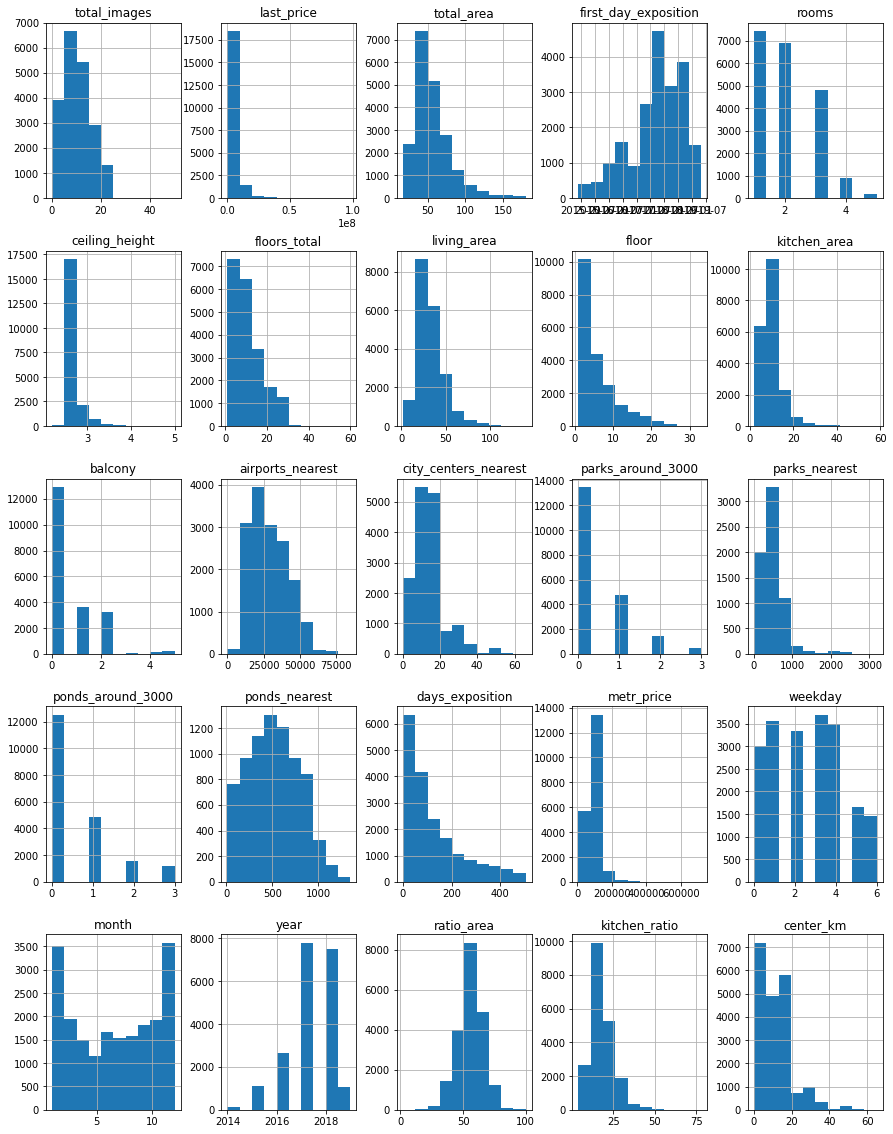

In [115]:
df.hist(figsize=(15, 20))
plt.show()

Графики по всем колонкам помогут наиболее наглядно просмотреть ситуацию с недвижимостью и определить ключевые значения, а также общие признаки у "существенной доле" (без учета аномальных значений) объектов недвижимости 

## Общий вывод
Абсолютный лидер по дорогивизне жилья - Санкт-Петербург.
Дальше 4 км средняя цена на квартиры снижается.

Площадь квартир в центре значительно больше, чем в целом по городу - в среднем до 14 метров. Также в центре находится большое число квартир с огромной площадью (100 квадратных метров и более).

Комнаты. В центре почти в два раза ниже доля однокомнатных квартир (16.17%), чем в среднем по городу (34,28 %). Почти половина четырёхкомнатных квартир находится в центре города (15 %), их доля почти в три раза выше, чем в среднем по городу (5,48 %). Большинство квартир с 5 комнатами и более находятся в центре города.

Дороже всего квартиры, опубликованные в среду, дешевле всего - в субботу, а также дороже - размещенные в декабре, дешевле всего - в марте.
В 2018 году квартиры очень сильно подешевели  что, вероятно, вызвано некоторым кризисом 2016-2017 годов. В 2019 году наблюдается тренд повышения цен, вероятно кризис стал стагнировать.

Самыми дешевые квартиры - на 1 этаже.

Чем больше площадь, тем выше стоимость. Корреляция этих параметров крайне высокая. Число комнат влияет на цену (больше комнат - больше цена), однако зависимость ниже, чем у площади. Можно сделать два вывода: бывают квартиры с большими по площади комнатами; квартиры в центре состоят из малого числа комнат, но стоят достаточно высоко.

Самые дорогие варианты квартир находятся в центре города, однако в центре также есть и достаточно дешёвые варианты.

Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.

Цена за квадрат выше у однокомнатных квартир и квартир с 4 и 5 комнатами. Последнее, вероятно, объясняется элитностью недвижимости или, что чаще всего бывает - меньшей востребованностью, поскольку ликвидность квартир более 3 комнат наиболее низкая.
___
## General conclusion
The absolute leader in the cost of housing is St. Petersburg.
After 4 km, the average price of apartments decreases.

The area of apartments in the center is much larger than in the whole city - on average up to 14 meters. Also in the center there is a large number of apartments with a huge area (100 square meters or more).

Rooms. The share of one-room apartments in the center is almost two times lower (16.17%) than the average in the city (34.28%). Almost half of the four-bedroom apartments are located in the city center (15%), their share is almost three times higher than the city average (5.48%). Most apartments with 5 rooms or more are located in the city center.

The most expensive apartments published on Wednesday, the cheapest - on Saturday, and also the most expensive - placed in December, the cheapest - in March.
In 2018, apartments fell very much in price, which is probably caused by some crisis of 2016-2017. In 2019, there is a trend of price increases, probably the crisis has become stagnant.
The cheapest apartments are on the 1st floor.

The larger the area, the higher the cost. The correlation of these parameters is extremely high. The number of rooms affects the price (more rooms means more price), but the dependence is lower than that of the area. Two conclusions can be drawn: there are apartments with large rooms; apartments in the center consist of a small number of rooms, but they stand high enough.

The most expensive apartment options are located in the city center, but there are also quite cheap options in the center.

The highest cost for apartments located not on the 1st and not on the last floor.

The price per square meter is higher for one-room apartments and apartments with 4 and 5 rooms. The latter is probably due to the elite real estate or, more often than not, less demand, since the liquidity of apartments with more than 3 rooms is the lowest.